In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from models.sms_ml_gradient_boosting_classifier import (
    SingletonSMSMLGradientBoostingClassifier,
)
from models.sms_ml_knn_classifier import SingletonSMSMLKNNClassifier
from models.sms_ml_logistic_regression_classifier import (
    SingletonSMSMLLogisticRegressionClassifier,
)
from models.sms_ml_naive_bayes_classifier import SingletonSMSMLNaiveBayesClassifier
from models.sms_ml_random_forest_classifier import SingletonSMSMLRandomForestClassifier
from models.sms_ml_svm_classifier import SingletonSMSMLSVMClassifier
from models.sms_bert_classifier import SingletonSMSBERTClassifier
from models.sms_lstm_classifier import SingletonSMSLSTMClassifier
from models.sms_rnn_classifier import SingletonSMSRNNClassifier
from utils.sms_utils import load_data_from_csv
import numpy as np
from utils.sms_utils import preprocess_text, balance_dataset
from sklearn.metrics import f1_score, recall_score, precision_score

def evaluate_classifiers(classifiers, X_train, Y_train, X_test, Y_test, is_training):
    accuracies = []
    f1_scores = []
    recalls = []
    precisions = []
    
    for classifier in classifiers:
        if is_training:
            classifier.train(X_train.copy(), Y_train.copy())
            classifier.save()
        else:
            classifier.load()

        print(f"Evaluating {classifier.model_name}...")
        Y_pred = classifier.predict(X_test.copy())
        
        accuracy = accuracy_score(Y_test.copy(), Y_pred)
        f1 = f1_score(Y_test.copy(), Y_pred, average='weighted')
        recall = recall_score(Y_test.copy(), Y_pred, average='weighted')
        precision = precision_score(Y_test.copy(), Y_pred, average='weighted')
        
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")
        
        accuracies.append(accuracy * 100)
        f1_scores.append(f1 * 100)
        recalls.append(recall * 100)
        precisions.append(precision * 100)
    
    return accuracies, f1_scores, recalls, precisions

def plot_metrics(model_names, accuracies, f1_scores, recalls, precisions):
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy (%)': accuracies,
        'F1 Score (%)': f1_scores,
        'Recall (%)': recalls,
        'Precision (%)': precisions
    })
    display(metrics_df)


def plot_accuracies(model_names, accuracies):
    accuracies = [accuracy[0] for accuracy in accuracies]
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Comparison")
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha="center", va="bottom")
    plt.show()

c:\Users\x\Documents\Github\spam-sms-detector-1123\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluating svm...
Accuracy: 0.9951052373959863
F1 Score: 0.9951052233232975
Recall: 0.9951052373959863
Precision: 0.9951128385971205


,Model,Accuracy (%),F1 Score (%),Recall (%),Precision (%)
0,svm,99.510524,99.510522,99.510524,99.511284


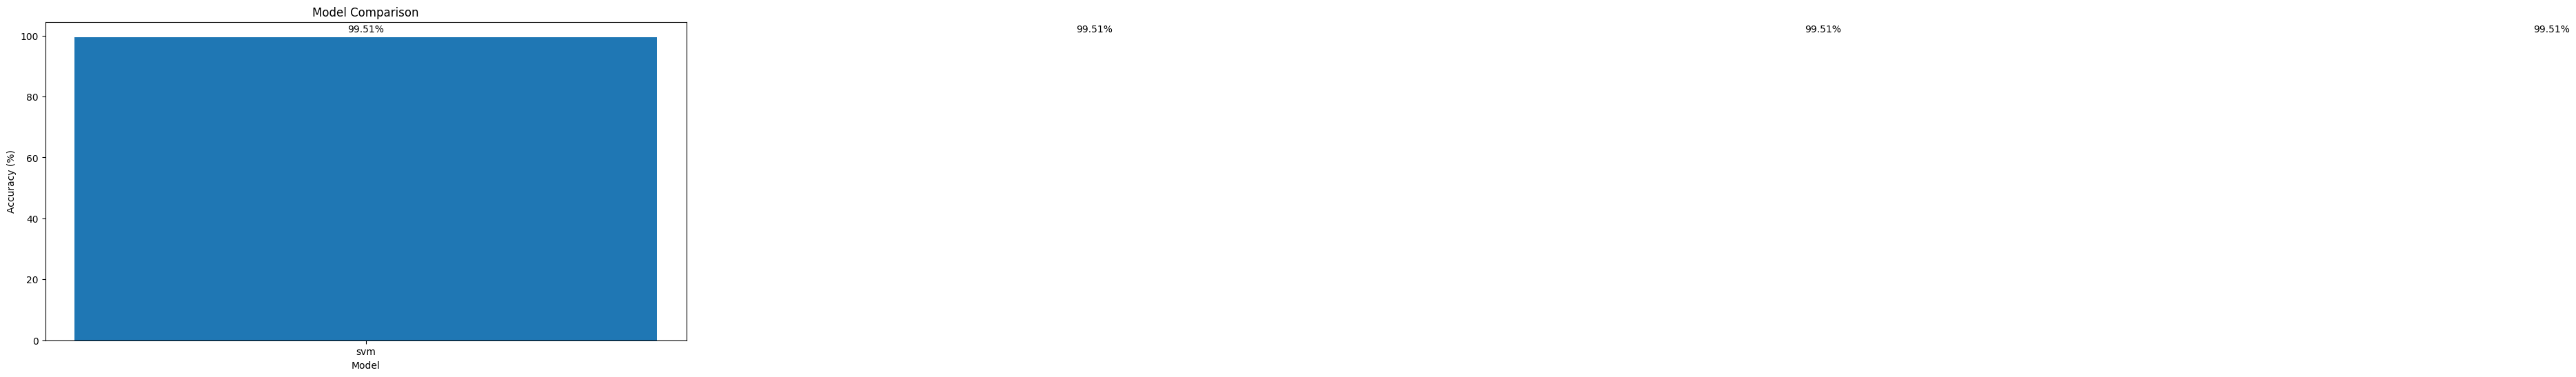

In [2]:
SMS_CSV_PATH = "./data/sms-data.csv"
MODEL_DIR = "./trained_models"
IS_TRAINING = False

classifiers = [
    SingletonSMSMLSVMClassifier(MODEL_DIR),
    # SingletonSMSMLNaiveBayesClassifier(MODEL_DIR),
    # SingletonSMSMLRandomForestClassifier(MODEL_DIR),
    # SingletonSMSMLLogisticRegressionClassifier(MODEL_DIR),
    # SingletonSMSLSTMClassifier(MODEL_DIR),
    # SingletonSMSBERTClassifier(MODEL_DIR),
    # SingletonSMSRNNClassifier(MODEL_DIR),
    # SingletonSMSMLGradientBoostingClassifier(MODEL_DIR),
    # SingletonSMSMLKNNClassifier(MODEL_DIR),
]
model_names = [classifier.model_name for classifier in classifiers]

X, Y = load_data_from_csv(SMS_CSV_PATH)
X = np.array([preprocess_text(x) for x in X])
X, Y = balance_dataset(X, Y)

# SMS_CSV_PATH_2 = "./data/sms-data-corpus.csv"
# X2, Y2 = load_data_from_csv(SMS_CSV_PATH_2)
# X2 = np.array([preprocess_text(x) for x in X2])
# accuracies = evaluate_classifiers(
#     classifiers, X, Y, X2, Y2, IS_TRAINING
# )

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
accuracies = evaluate_classifiers(
    classifiers, X_train, Y_train, X_test, Y_test, IS_TRAINING
)

plot_metrics(model_names, *accuracies)

plot_accuracies(model_names, accuracies)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from models.di import TfidfVectorizerFactory

X, Y = load_data_from_csv(SMS_CSV_PATH)
X = np.array([preprocess_text(x) for x in X])
X, Y = balance_dataset(X, Y)

vectorizer = TfidfVectorizerFactory().vectorizer
vectorizer.fit(X.copy())
X_tfidf_transformed = vectorizer.transform(X.copy())

# Khởi tạo mô hình SVM
svc = SVC(random_state=42, probability=True)

# Định nghĩa các giá trị của C và kernel để thử nghiệm
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Chỉ dùng khi sử dụng kernel RBF hoặc poly
}

# Sử dụng GridSearchCV để tìm các tham số tối ưu
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
grid_search.fit(X_tfidf_transformed, Y)

# In ra các tham số tối ưu
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=  23.6s
